In [1]:
import numpy as np
import xarray as xr
import salishsea_tools.river_202108 as rivers
import matplotlib.pyplot as plt
import dask
import dask.array as da

In [2]:
ds = xr.open_dataset('/ocean/cdonaldson/research_runs/long_dye_tracers/extractions/SalishSeaCast_river_trace_day_avg_Fraser_all_20170101_20181231.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

(390.0, 430.0)

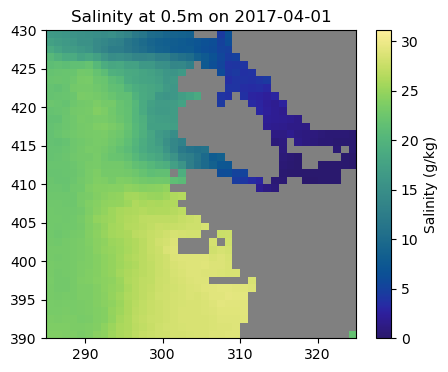

In [70]:
# import cmocean.cm as cm

# # open the mesh mask and use it to mask the land
# mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# # the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
# tmask = 1 - mesh.tmask[0]

# cmap = cm.haline
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# ax.set_title('Salinity at 0.5m on 2017-04-01')
# salinity = np.ma.masked_array(snap_phys.vosaline[0, 0], mask=tmask[0])
# colours = ax.pcolormesh(salinity, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Salinity (g/kg)')
# ax.set_xlim([285, 325])
# ax.set_ylim([390, 430])

In [93]:
# np.diff(snap_phys.deptht, axis=0)

array([ 1.0000029,  1.0000083,  1.0000191,  1.00004  ,  1.0000801,
        1.0001597,  1.0003128,  1.0006127,  1.0011969,  1.0023327,
        1.0045462,  1.0088549,  1.0172453,  1.0335703,  1.0653057,
        1.1268854,  1.2459621,  1.4746494,  1.9081936,  2.7102776,
        4.1296597,  6.455841 ,  9.831966 , 13.96661  , 18.101254 ,
       21.477371 , 23.803558 , 25.222946 , 26.025024 , 26.458557 ,
       26.687256 , 26.806335 , 26.867905 , 26.899658 , 26.915985 ,
       26.924347 , 26.92868  , 26.930878 , 26.932007 ], dtype=float32)

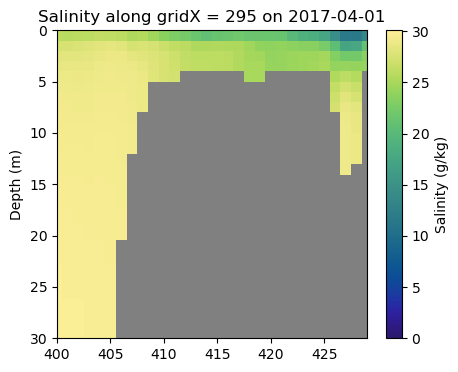

In [90]:
gridY = np.arange(0, 898)
# fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# salinity = np.ma.masked_array(snap_phys.vosaline[0, :, 390:430, 295], mask=tmask[:, 390:430, 295])
# # colours = ax.pcolormesh(snap_phys.nav_lon[295, 390:430+1], snap_phys.deptht, salinity[:39], cmap=cmap)
# colours = ax.pcolormesh(gridY[390:430], snap_phys.deptht, salinity[:40], cmap=cmap, vmin=0)
# ax.set_title('Salinity along gridX = 295 on 2017-04-01')
# ax.set_ylim(0, 30)
# ax.set_xlim(400,429)
# ax.invert_yaxis();
# ax.set_ylabel('Depth (m)')
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Salinity (g/kg)');

In [4]:
e1t_arr = np.zeros((40, 898, 398)) + 500
e1t_dshape = e1t_arr[np.newaxis, ...]
e2t_arr = np.zeros((40, 898, 398)) + 440
e2t_dshape = e2t_arr[np.newaxis, ...]
e3t_arr = snap_phys['e3t'].to_numpy()[0, :, :, :]
e3t_dshape = e3t_arr[np.newaxis, ...]

mult_factor = e1t_dshape * e2t_dshape * e3t_dshape

In [5]:
variable_to_multiply = ds['fraser_river']

In [6]:
variable_to_multiply.shape

(730, 40, 898, 398)

In [33]:
result = variable_to_multiply * mult_factor

In [34]:
result = result.compute()

KeyboardInterrupt: 

In [35]:
result

<xarray.DataArray 'fraser_river' (time: 730, depth: 40, gridY: 898, gridX: 398)>
dask.array<mul, shape=(730, 40, 898, 398), dtype=float64, chunksize=(177, 9, 218, 95), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01T12:00:00 ... 2018-12-31T12:00:00
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397